In [1]:
import sympy as sy
import numpy as np
import math
from matplotlib import pyplot as plt

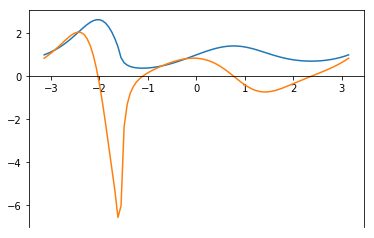

In [5]:
### PROBLEM 1

def function_pb1(): 
    x = sy.symbols('x')
    func = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
    deriv = sy.diff(func)
    return(func, deriv)

x = sy.symbols("x")

function = sy.lambdify(x, function_pb1()[0])
derivative = sy.lambdify(x, function_pb1()[1])
   
ax = plt.gca()

ax.plot(np.linspace(-np.pi, np.pi, 100), 
        function(np.linspace(-np.pi, np.pi, 100)))

ax.plot(np.linspace(-np.pi, np.pi, 100), 
        derivative(np.linspace(-np.pi, np.pi, 100)))

ax.spines["bottom"].set_position("zero")



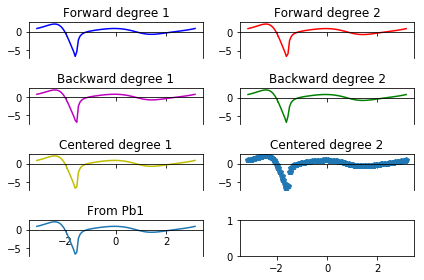

In [6]:
### PROBLEM 2

def forward_order1(f_handle, x_array, h_float):
    diff_quotient = (f_handle(x_array + h_float) - f_handle(x_array)) / h_float
    return diff_quotient

def forward_order2(f_handle, x_array, h_float):
    diff_quotient = (-3*f_handle(x_array) + 4*f_handle(x_array + h_float) - f_handle(x_array + 2*h_float)) / (2*h_float)
    return diff_quotient

def backward_order1(f_handle, x_array, h_float):
    diff_quotient = (f_handle(x_array) - f_handle(x_array - h_float)) / h_float
    return diff_quotient

def backward_order2(f_handle, x_array, h_float):
    diff_quotient = (3*f_handle(x_array) - 4*f_handle(x_array - h_float) + f_handle(x_array - 2*h_float)) / (2*h_float)
    return diff_quotient

def centered_order1(f_handle, x_array, h_float):
    diff_quotient = (f_handle(x_array + h_float) - f_handle(x_array - h_float)) / (2*h_float)
    return diff_quotient

def centered_order2(f_handle, x_array, h_float):
    diff_quotient = (f_handle(x_array - 2*h_float) - 8*f_handle(x_array - h_float) + 
                     8*f_handle(x_array + h_float) - f_handle(x_array + 2*h_float)) / (12*h_float)
    return diff_quotient


f_handle = function
x_array = np.linspace(-np.pi, np.pi, 100)
h_float = 0.01

fig, ax = plt.subplots(4,2,sharex=True, sharey=False)

ax[0,0].plot(x_array, forward_order1(f_handle, x_array, h_float), "b")
ax[0,1].plot(x_array, forward_order2(f_handle, x_array, h_float), "r")

ax[1,0].plot(x_array, backward_order1(f_handle, x_array, h_float), "m")
ax[1,1].plot(x_array, backward_order2(f_handle, x_array, h_float), "g")

ax[2,0].plot(x_array, centered_order1(f_handle, x_array, h_float), "y")
ax[2,1].plot(x_array, centered_order2(f_handle, x_array, h_float), "p")

ax[3,0].plot(np.linspace(-np.pi, np.pi, 100), 
        derivative(np.linspace(-np.pi, np.pi, 100)))

ax[0,1].spines["bottom"].set_position("zero")
ax[0,0].spines["bottom"].set_position("zero")
ax[1,1].spines["bottom"].set_position("zero")
ax[1,0].spines["bottom"].set_position("zero")
ax[2,1].spines["bottom"].set_position("zero")
ax[2,0].spines["bottom"].set_position("zero")
ax[3,0].spines["bottom"].set_position("zero")

ax[0,0].set_title("Forward degree 1")
ax[0,1].set_title("Forward degree 2")
ax[1,0].set_title("Backward degree 1")
ax[1,1].set_title("Backward degree 2")
ax[2,0].set_title("Centered degree 1")
ax[2,1].set_title("Centered degree 2")
ax[3,0].set_title("From Pb1")

plt.tight_layout()
plt.show()

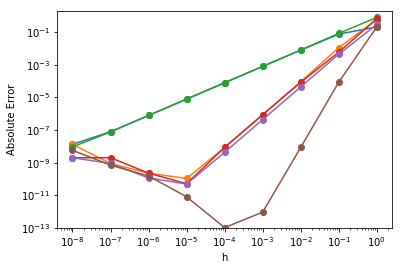

In [7]:
### PROBLEM 3

def function_pb3(x):
    h = np.logspace(-8, 0, 9)

    true = derivative(1)
    forward1 = forward_order1(function, x, h)
    forward2 = forward_order2(function, x, h)
    backward1 = backward_order1(function, x, h)
    backward2 = backward_order2(function, x, h)
    centered1 = centered_order1(function, x, h)
    centered2 = centered_order2(function, x, h)

    error_f1 = abs(true - forward1)
    error_f2 = abs(true - forward2)
    error_b1 = abs(true - backward1)
    error_b2 = abs(true - backward2)
    error_c1 = abs(true - centered1)
    error_c2 = abs(true - centered2)

    ax = plt.gca()
    ax.plot(h, error_f1, "o-")
    ax.plot(h, error_f2, "o-")
    ax.plot(h, error_b1, "o-")
    ax.plot(h, error_b2, "o-")
    ax.plot(h, error_c1, "o-")
    ax.plot(h, error_c2, "o-")

    ax.set_ylim(10**(-13), 2)
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    ax.set_xlabel("h")
    ax.set_ylabel("Absolute Error")
    
function_pb3(1)

In [109]:
### PROBLEM 5: numerical differentiation in higher dimensions
### still need to add the function as argument

x = sy.symbols('x')
y = sy.symbols('y')
X = [x,y]

def easy_funct(X): 
    x = X[0]
    y = X[1]
    func = np.array([x**2, x**3 - y])
    return(func)

def find_jacobian(X0,h,f):
    #easy_funct(X0)
    
    # define the standard basis vector
    e = np.identity(len(X0))
    
    # Initiate the Jacobian
    Jacob = np.zeros((len(X),len(f(X))))
    
    # Fill the Jacobian with the second order centered difference quotient
    for i in range(0,len(X0)):
        function = ((f(X0[i] + h*e[i,:]) - f(X0[i] - h*e[i,:])) / (2*0.01))
        for j in range(0,len(X0)):
            Jacob[i,j] = function[j]
            
    return(Jacob)


find_jacobian(np.array([1,1]), 0.01, easy_funct)


array([[ 2.    ,  3.0001],
       [ 0.    , -1.    ]])

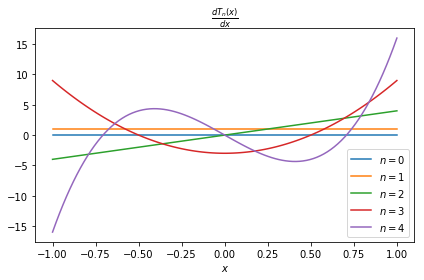

In [198]:
### PROBLEM 6
import autograd
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

def Compute_Cheby(x, n):
    if n == 0:
        return anp.ones_like(x)
    if n == 1:
        return x
    if n > 1:
        return 2*x*Compute_Cheby(x,n-1) - Compute_Cheby(x, n-2)

Compute_Cheby(10,10)

TnXprime = elementwise_grad(Compute_Cheby)
grid = anp.linspace(-1,1,100)

for i in range(5):
    plt.plot(grid, TnXprime(grid, i), label=r'$n= %d$' %i)
plt.xlabel(r"$x$")
plt.title(r"$\frac{d T_n(x)}{d x}$")
plt.legend()
plt.tight_layout()
plt.show()
